In [1]:
# # IMPORTANT FOR GCP: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATASETS
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE CELL.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote
# from urllib.error import HTTPError
# from zipfile import ZipFile

# CHUNK_SIZE = 40960
# DATASET_MAPPING = 'learning-equality-curriculum-recommendations:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F39585%2F4786639%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230330T121941Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0e178d44767043b7dd69930ea61f7796a2f041a6d7a21cdc0a7c08d0098316e4ddeecc8af1ec32b19320b36bdbe824644c13a3f77a7ac2c3d90318a617331064ebd110b1c2a01ed268499d44badc08cf6a0769832f0c438829039272341b6fc7e1c9a54e9ea5ad5d5d37340eee6dd7c7d5926d558274fc110925d435671f88fa1f9d35e98614dc58636767f293ec2b619cdfd064784fdf9980c4316b8e3a63b357fafd121f1782c8a3c4ca330f8300225dde5cf7fd9ada3004ed62a1358c160c19f5ecb459c4676c1a3251e08ad45ccf93f8ceed52384f7f28bc2e979cb92095037261592d47594909c67c51664b4e39e74b7b34667a0e5b41f16ee59f601e45,torch-geometric:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1640734%2F5079195%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230330T121942Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5920d1bae864465fefb5f57a3b8bfb62965050018aafaa70b732f8d2fa1cc6160d84acc330c7970ee6c05fdf18a147d8c6ff4611e02299a7c049258d03816aaa3e324760bde5198065fe60ee5ce58cb31c000a2d6d92750434bda774e65fbea0d4ea9584244c3c3f5c15498394aa4bc9697ac525b869d2cd1c95e6ae5b1fcf685e3d77f792241ac2913079061dc8f71e100d004997fa390f88c9b059510e33448abec70e1b4f66b72b36e905ca242fac4f7ec0a43f231107bd7d1223edd2678e77cf1e4103faee162006c1be4e3e9b54fb982944134a8653c7bbad40dc38df611813b80adff6424d9ac74769f654c008b6299549e50ffaf98ae237cc12d84265,faissgpu:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2949364%2F5079588%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230330T121942Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc57da31c392a484cafd71d043e9b5d1ad9f48f60c670c3ca23d1e815d8d74135b6d3ee54f471dd5d25b0c83df1daad570314bed3c30b44761037138cca2e1a3c014eaaff40fb81436d0efdf8c59456266ded13ef694aa53c0fc3c66f4920aac660fc3f1c2125ef383e951a0648488c7e42a7398bab274137c5a75e652b54f7eb68646c67848b6acd16812d8e4b35091527a878a02f8bff85a3592e278d1112e32062326066b912198142f6636ac23a94f4eb7f9a97bb73718fef77d6109429055ff1e263811a68baebde080100410d9ed7ede4513dc4ff9d53c47d04055dba2e53e9f2203e6b8120e5e6458ccbf43e824d927f00f04eea0a67bfc9a1c18cb2f0,lecr-training-encodings-256:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3028709%2F5207339%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230330T121942Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9f7cf574c9622a6f5f239a5050ddc640a9c9ace13c838f29712b1f67e81af306ba1ad658034fb550ec6c7d539222183add92cb73e23ae27388c02950e197157cc680fe8be34b3bbec515523af4ae18fad907ee3bfa7338c5b93216aeac5e3e96f11b0a71cf2882bd5ad4b899fb0b149bcb7957d57360db0596813ad87c21c881a2d76a1e23ea442c9fcb66ca17fa76db4cf0e8ada125609c621a76b313fc81c85c0929eb0f4696fa4cafc6a3d20573166caa0354c77fefecd70b66a49286207cfe29b859dc90d98b24bb39450e9a458a0d16eb48669d6df623a8915842057adcede9d14e236e97328317691231d5810840a67dccd55580f25a9132a981505d13,lecr-models:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3054344%2F5256493%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230330T121942Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D348b4676f0920dce4322a5c31de7984731c7806b31587c560c7dd29b7eba3b75dfb0051af2351d93541a1bc3c7ed81a80fa2a2995d5be3d46e2cc529c413025aadab380ee95e8a116a90a323c281cd7258760c9252caa737ba9582e4186b864f12d1c5f1f52c1e9ad0ef3a46b6d8636874a4f5995df135a39bce6978a1d1ce78f3ff8884a8e1bf66698fa4b0b73eaf2228a78c685648720ecc4f2f8b331172f263860b247b1fbbaddf06f2b22a03de6ee8aea3e3e170690d38350c0c8919fa5069852664f31b8febe987d6d4513a007d5969970d6983961977d0b10d9098214227979e6386805036b94fc7db25fba75109419a0b03dfe46ff970cdcece0bb532'
# KAGGLE_INPUT_PATH='/home/jupyter/kaggle/input'
# # KAGGLE_INPUT_SYMLINK='/kaggle'

# os.makedirs(KAGGLE_INPUT_PATH)
# # os.symlink(KAGGLE_INPUT_PATH, os.path.join('..', 'input'), target_is_directory=True)
# # os.makedirs(KAGGLE_INPUT_SYMLINK)
# # os.symlink(KAGGLE_INPUT_PATH, os.path.join(KAGGLE_INPUT_SYMLINK, 'input'), target_is_directory=True)

# for dataset_mapping in DATASET_MAPPING.split(','):
#     directory, download_url_encoded = dataset_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     # try:
#     with urlopen(download_url) as zipfileres, NamedTemporaryFile() as tfile:
#         total_length = zipfileres.headers['content-length']
#         print(f'Downloading {directory}, {total_length} bytes zipped')
#         dl = 0
#         data = zipfileres.read(CHUNK_SIZE)
#         while len(data) > 0:
#             dl += len(data)
#             tfile.write(data)
#             done = int(50 * dl / int(total_length))
#             sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#             sys.stdout.flush()
#             data = zipfileres.read(CHUNK_SIZE)
#         print(f'\nUnzipping {directory}')
#         with ZipFile(tfile) as zfile:
#             zfile.extractall(destination_path)
#     # except HTTPError as e:
#     #     print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#     #     continue
#     # except OSError as e:
#     #     print(f'Failed to load {download_url} to path {destination_path}')
#     #     continue
# print('Dataset import complete.')


### Installs

In [2]:
%%capture

offline_packages = True # for packages not included in Kaggle env as of 14.03.2023

if offline_packages:
    !pip install faiss-gpu --no-index --find-links=file:///kaggle/input/faissgpu/
    !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric --no-index --find-links=file:///kaggle/input/torch-geometric/
    pass
else:
    !pip install faiss-gpu torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric tensorboard
    pass

### Main

In [3]:
# --------------------------------------------------------------------------- #
#                                  Imports                                    #
# --------------------------------------------------------------------------- #
import os
import gc
import shutil
import time
import logging
import psutil
import numpy as np
import pandas as pd
# import faiss
import torch
import torch.nn.functional as F
from torch import nn, Tensor, tensor
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from torch_geometric.data import HeteroData
from torch_geometric.loader import NeighborSampler
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import add_random_edge
from torch_geometric.utils.subgraph import bipartite_subgraph
from transformers import \
    AutoModel, AutoModelForSequenceClassification, AutoConfig,\
    PreTrainedTokenizerFast, BatchEncoding
from sklearn.model_selection import GroupKFold
from pathlib import Path
from typing import Callable, Dict, List, Sequence, Tuple, Union, Optional
from functools import wraps
from datetime import datetime
from collections import defaultdict
from inspect import getframeinfo, stack
from tqdm import tqdm
from numpy.typing import NDArray

# --------------------------------------------------------------------------- #
#                                 Utilities                                   #
# --------------------------------------------------------------------------- #
# Setup functions
def set_seed(seed: int = 13) -> None:
    global g
    g_pt = torch.Generator()
    g_pt.manual_seed(seed)
    torch.manual_seed(seed)
    g_np = np.random.default_rng(seed)
    g = {'pt': g_pt, 'np': g_np}
    
def setup_output(clear_checkpoints: bool = False, clear_working: bool = False,
                ) -> None:
    # Clear and/or make checkpoints directory
    if clear_checkpoints and cfg.checkpoints_dir.is_dir():
        shutil.rmtree(cfg.checkpoints_dir)
    cfg.checkpoints_dir.mkdir(parents=True, exist_ok=True)
    cfg.encodings_dir.mkdir(parents=True, exist_ok=True)
    
    # Clear working directory
    if clear_working:
        for path in Path('/kaggle/working').iterdir():
            if path.name.startswith('__'):
                continue
            if path.is_file():
                os.remove(path)
            elif path.is_dir():
                shutil.rmtree(path)

def get_logger(logfile: Path) -> logging.Logger:
    # Init logger
    if logfile.is_file(): os.remove(logfile)
    logfile.parents[0].mkdir(parents=True, exist_ok=True)
    logger = logging.getLogger(__name__)
    logger.handlers.clear()
    logger.setLevel(logging.DEBUG)
    
    # Create handlers
    c_handler = logging.StreamHandler()
    f_handler = logging.FileHandler(logfile)
    c_handler.setLevel(logging.DEBUG)
    f_handler.setLevel(logging.DEBUG)
    
    # Format handlers
    c_format = logging.Formatter('%(levelname)s - %(message)s')
    f_format = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    c_handler.setFormatter(c_format)
    f_handler.setFormatter(f_format)
    
    # Add handlers to logger
    logger.addHandler(c_handler)
    logger.addHandler(f_handler)
    
    return logger

# Additional utilities
def print_log(logfile: Path) -> None:
    try:
        with open(logfile) as f:
            for line in f.readlines():
                print(line)
    except:
        pass
        
def timeit(func: Callable) -> Callable:
    """Debug decorator to time a function."""
    @wraps(func)
    def wrapper(*args, **kwargs):
        t0 = time.perf_counter()
        out = func(*args, **kwargs)
        t1 = time.perf_counter()
        logger.debug(f'{func.__name__} took {t1 - t0:.6f} s to complete.')
        return out
    return wrapper

def DEBUG_RAM() -> None:
    """Debug function to print RAM and VRAM usage."""
    caller = getframeinfo(stack()[1][0])
    try:
        gpu_ram = round(torch.cuda.memory_allocated() / 
                        torch.cuda.max_memory_allocated(), 1)
    except ZeroDivisionError:
        gpu_ram = None
    ram = psutil.virtual_memory().percent
    vram = round(psutil.virtual_memory().available * 100 /
                 psutil.virtual_memory().total, 1)
    logger.debug(f'{caller.filename}:{caller.lineno} - '
                 f'RAM {ram}% : VRAM {vram}% : GPU_RAM {gpu_ram}%')

def id_to_int(item_ids: Union[NDArray[np.str_], pd.Index],
              item_type: str = 'topic') -> NDArray:
    """Get the integer representation of topic or content id(s)."""
    global topics_df, content_df
    if type(item_ids) == str:
        item_ids = [item_ids]
    if item_type == 'topic':
        return topics_df.loc[item_ids, 'num'].values
    elif item_type == 'content':  
        return content_df.loc[item_ids, 'num'].values
    else:
        raise Exception(f'item_type: {item_type} not implemented')
        
def int_to_id(item_nums: Union[List[int], NDArray[np.int_]],
              item_type: str = 'topic') -> pd.Index:
    """Get the string id representation of topic or content number(s)."""
    if type(item_nums) == int:
        item_nums = [item_nums]
    if item_type == 'topic':
        return topics_df.index[item_nums]
    elif item_type == 'content':  
        return content_df.index[item_nums]
    else:
        raise Exception(f'item_type: {item_type} not implemented')

def tensor_dict_to(tensor_dict: Dict[str, Tensor], pin_memory: bool = False, 
                   device: Union[str, torch.device] = None
                   ) -> Dict[str, Tensor]:
    """Return a dictionary of tensors on the specified device, with option
    to stage in pinned memory."""
    out = {}
    for k, t in tensor_dict.items():
        if pin_memory and (device is not None):
            out[k] = t.pin_memory().to(device, non_blocking=True)
        elif pin_memory:
            out[k] = t.pin_memory()
        elif device is not None:
            out[k] = t.to(device)
        else:
            out[k] = t
    return out

def pass_arg(i: int = 0):
    """Partial wrapper of function that returns the i'th input argument (for
    projection/bypass functions)."""
    return lambda *args: args[i]

# Topic & content classes from competition hosts
class Topic:
    def __init__(self, topic_id):
        self.id = topic_id
        
    @property
    def parent(self):
        parent_id = topics_df.loc[self.id].parent
        if pd.isna(parent_id):
            return None
        else:
            return Topic(parent_id)
        
    @property
    def ancestors(self):
        ancestors = []
        parent = self.parent
        while parent is not None:
            ancestors.append(parent)
            parent = parent.parent
        return ancestors
    
    @property
    def siblings(self):
        if not self.parent:
            return []
        else:
            return [topic for topic in self.parent.children if topic != self]
        
    def get_breadcrumbs(self, separator=" >> ", include_self=True,
                        include_root=True):
        ancestors = self.ancestors
        if include_self:
            ancestors = [self] + ancestors
        if not include_root:
            ancestors = ancestors[:-1]
        return separator.join(reversed([a.title for a in ancestors]))
    
    @property
    def children(self):
        return [Topic(child_id) for child_id in topics_df[topics_df.parent
                                                          == self.id].index]
    
    def subtree_markdown(self, depth=0):
        markdown = "  " * depth + "- " + self.title + "\n"
        for child in self.children:
            markdown += child.subtree_markdown(depth=depth + 1)
        for content in self.content:
            markdown += ("  " * (depth + 1) + "- " + 
                "[" + content.kind.title() + "] " + content.title) + "\n"
        return markdown
    
    def __eq__(self, other):
        if not isinstance(other, Topic):
            return False
        return self.id == other.id
    
    def __getattr__(self, name):
        return topics_df.loc[self.id][name]
    
    def __str__(self):
        return self.title
    
    def __repr__(self):
        return f"<Topic(id={self.id}, title=\"{self.title}\")>"
    
    # NEW
    # Get all content items in the subtree of this topic
    @property
    def subtree_content(self):
        content = self.content
        for child in self.children:
            content += child.subtree_content
        return content
    
    # Get root topic of this topic
    @property
    def root(self):
        if self.parent is None:
            return self
        else:
            return self.ancestors[-1]
        
    # EDITED
    # Originally 'content' property, now method with option to get ids only.
    def get_content(self, ids=False):
        if self.id in correlations_df.index:
            if ids: return correlations_df.loc[self.id].content_ids
            return [ContentItem(content_id) for content_id in 
                    correlations_df.loc[self.id].content_ids]
        else:
            return tuple([]) if self.has_content else []
        
    @property
    def content(self):
        return self.get_content()
    
    @property
    def content_ids(self):
        return self.get_content(ids=True)
    
class ContentItem:
    def __init__(self, content_id):
        self.id = content_id
        
    def __getattr__(self, name):
        return content_df.loc[self.id][name]
    
    def __str__(self):
        return self.title
    
    def __repr__(self):
        return f"<ContentItem(id={self.id}, title=\"{self.title}\")>"
    
    def __eq__(self, other):
        if not isinstance(other, ContentItem):
            return False
        return self.id == other.id
    
    def get_all_breadcrumbs(self, separator=" >> ", include_root=True):
        breadcrumbs = []
        for topic in self.topics:
            new_breadcrumb = topic.get_breadcrumbs(separator=separator,
                                                   include_root=include_root)
            if new_breadcrumb:
                new_breadcrumb = new_breadcrumb + separator + self.title
            else:
                new_breadcrumb = self.title
            breadcrumbs.append(new_breadcrumb)
        return breadcrumbs
    
    # EDITED
    @property
    def topics(self):
        return [Topic(topic_id) for topic_id in correlations_df.mask(
            ~correlations_df.applymap(lambda x: self.id in x)).dropna().index]

def get_ids(item_list: List[Union[Topic, ContentItem]]) -> List[str]:
    idx = [item.id for item in item_list]
    assert len(item_list)==len(idx), "Input and output lengths do not match"
    return idx

# --------------------------------------------------------------------------- #
#                               Pre-processing                                #
# --------------------------------------------------------------------------- #
def make_repr(df: pd.DataFrame, use_title: bool = True, use_descr: bool = False,
              use_text: bool = False, use_level: bool = False,
              ) -> List[str]:
    """Return a list of concatenated text representations for all topic or
    content items with text features in a DataFrame."""
    fields = []
    if use_title: fields.append('title')
    if use_descr: fields.append('description')
    if use_text: fields.append('text')
    if use_level: fields.append('level')
    
    text = [df[field].to_list() for field in fields]
    text = [f' {cfg.field_sep_token} '.join([f for f in t if f != ''])
            for t in zip(*text)]
    return text

@timeit
def encode_in_chunks(text: List[str], tokenizer: PreTrainedTokenizerFast,
                     max_seq_length: int = 512, chunk_size: int = 16384,
                     ) -> BatchEncoding:
    """Encode text in chunks to avoid OOM errors."""
    encodings = BatchEncoding()
    for offset in range(0, len(text), chunk_size):
        encodings_chunk = tokenizer(text[offset:offset+chunk_size],
            padding='max_length', truncation=True, max_length=max_seq_length,
            return_tensors='np')
        for k, v in encodings_chunk.items():
            if k not in encodings:
                encodings[k] = v
            else:
                encodings[k] = np.concatenate((encodings[k], v), axis=0)
    return encodings

def memmap_encodings(encodings: BatchEncoding, path: Union[str, Path],
                     ) -> np.memmap:
    """Save encodings to a memmap file (overwrite if exists)."""
    values = np.array(list(encodings.values()), dtype=int)
    encodings = np.memmap(path, mode='w+', shape=values.shape, dtype=int)
    encodings[:] = values[:]
    encodings.flush()
    encodings.setflags(write=False)
    return encodings
        
@timeit
def prepare_data(train: bool = True, load_enc: bool = False) -> None:
    """Prepare data for training or inference."""
    global cfg, logger, topics_df, topic_encodings, content_df, \
        content_encodings, correlations_df, sample_submission_df, \
        tc_edge_index, tt_edge_index, neighbor_sampler, tc_graph
    
    # Load raw data
    logger.info('Loading raw data.')
    topics_df = pd.read_csv(cfg.input_dir/'topics.csv')\
        .rename(columns={'id': 'topic_id'})\
        .set_index('topic_id')\
        .fillna({'title': '', 'description': ''})
    topics_df['level'] = topics_df.level.apply(lambda x: f'Level {x}')
    topics_df['num'] = range(len(topics_df))
    content_df = pd.read_csv(cfg.input_dir/'content.csv')\
        .rename(columns={'id': 'content_id'})\
        .set_index('content_id')\
        .fillna('')
    content_df['num'] = range(len(content_df))
    sample_submission_df = pd.read_csv(cfg.input_dir/'sample_submission.csv')
    
    if train:
        # Load training labels
        correlations_df = pd.read_csv(cfg.input_dir/'correlations.csv') \
            .set_index('topic_id')
        correlations_df['content_ids'] = correlations_df.content_ids.str \
            .split(' ')
    
        if cfg.max_topics: 
            # Optional topic subselction
            topics_df = topics_df.sample(cfg.max_topics) #TODO: sample by channel to make compatible with building tt-graph (need all parents)
            correlations_df = correlations_df.loc[
                topics_df.loc[topics_df.has_content].index]
            content_ids = correlations_df.explode('content_ids').content_ids \
                .unique()
            content_df = content_df.loc[content_ids]
            
        logger.info('Making CV splits.')
        # Get non-source topics for validation
        kfold_topics = topics_df.loc[topics_df.category != 'source']
        if cfg.val_size:
            # Subselect topics for validation
            kfold_topics = kfold_topics.sample(cfg.k_folds * cfg.val_size)
        kfold_topics = kfold_topics.index
        # Set aside topics for training only
        topics_df.loc[~topics_df.index.isin(kfold_topics), 'fold'] \
            = cfg.train_only_fold
        group_kfold = GroupKFold(cfg.k_folds)
        # Make CV splits grouped by channel
        for fold, (_, val_inds) in enumerate(group_kfold.split(
            X=topics_df.loc[kfold_topics],
            groups=topics_df.loc[kfold_topics, 'channel']
        )):
            topics_df.loc[kfold_topics[val_inds], 'fold'] = fold
        del group_kfold
        gc.collect()
           
    if load_enc:
        # Load tokenized text from existing memmap bin
        # !NOTE: ensure 'llen' is set to the saved encodings sequence length!
        llen = 256
        logger.info(f'Loading encodings.')
        topic_encodings = np.memmap(cfg.encodings_dir/'topic_enc.bin',
                                    mode='r', shape=(3, len(topics_df), llen),
                                    dtype=int)[..., :cfg.max_seq_length]
        content_encodings = np.memmap(cfg.encodings_dir/'content_enc.bin',
                                      mode='r', shape=(3, len(content_df), llen),
                                      dtype=int)[..., :cfg.max_seq_length]
    else:
        # Or tokenize text and memmap to disk
        logger.info(f'Encoding topics ({len(topics_df)}).')
        text = make_repr(topics_df,
                         use_title=cfg.use_topic_title,
                         use_descr=cfg.use_topic_descr,
                         use_level=cfg.use_topic_level)
        encodings = encode_in_chunks(text, cfg.tokenizer, cfg.max_seq_length)
        topic_encodings = memmap_encodings(encodings,
                                           cfg.encodings_dir/'topic_enc.bin')
        
        logger.info(f'Encoding contents ({len(content_df)}).')
        text = make_repr(content_df,
                         use_title=cfg.use_content_title,
                         use_descr=cfg.use_content_descr,
                         use_text=cfg.use_content_text)
        encodings = encode_in_chunks(text, cfg.tokenizer, cfg.max_seq_length)
        content_encodings = memmap_encodings(encodings,
                                             cfg.encodings_dir/'content_enc.bin')
            
    if train:
        # Keep training columns
        topics_df = topics_df.loc[:, ['num', 'fold', 'parent', 'language',
                                      'has_content', 'title']]
        content_df = content_df.loc[:, ['num', 'kind', 'language', 'title']]
    
        # Build edge index for topic-content graph
        tc_pairs = correlations_df.explode('content_ids')
        source_nodes = id_to_int(tc_pairs.index, item_type='topic')
        target_nodes = id_to_int(tc_pairs.content_ids, item_type='content')
        tc_edge_index = [source_nodes, target_nodes]
        tc_edge_index = tensor(np.vstack(tc_edge_index), dtype=torch.int)
        _, sorted_idx = tc_edge_index[0].sort()
        tc_edge_index = tc_edge_index.gather(1, sorted_idx \
                                                .expand(tc_edge_index.size()))

        tc_graph = HeteroData()
        tc_graph['topic'].x = torch.tensor(topics_df.num.values, 
                                           dtype=torch.long).view(-1, 1)
        tc_graph['content'].x = torch.tensor(content_df.num.values,
                                             dtype=torch.long).view(-1, 1)
        tc_graph['topic', 'content'].edge_index = tc_edge_index.type(torch.long)
    else:
        # Keep inference columns
        topics_df = topics_df.loc[:, ['num', 'parent', 'language', 'title']]
        content_df = content_df.loc[:, ['num', 'kind', 'language', 'title']]
    
    # Build edge index and neighbor sampler for topic-topic graph 
    # (CV split by 'channel', i.e. disjoint train and val tt-graphs
    #     => global tt-graph)
    topic_parents = topics_df.loc[~topics_df['parent'].isna(), 'parent']
    tt_edge_index = [id_to_int(topic_parents.index),
                     id_to_int(topic_parents.values)]
    tt_edge_index = tensor(np.vstack(tt_edge_index), dtype=torch.int)
    _, sorted_idx = tt_edge_index[0].sort()
    tt_edge_index = tt_edge_index.gather(1, sorted_idx.expand(
                                                tt_edge_index.size()))
    
    undirected_tt_edge_index = torch.cat((tt_edge_index, tt_edge_index.flip(0)),
                                         1).type(torch.long)
    neighbor_sampler = NeighborSampler(edge_index=undirected_tt_edge_index,
                                       sizes=cfg.neighborhood_sizes,
                                       shuffle=True,
                                       return_e_id=False)
    
    logger.info(f"Successfully loaded and processed data.")
    
# --------------------------------------------------------------------------- #
#                                  Model                                      #
# --------------------------------------------------------------------------- #
class BaseModule(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        raise NotImplementedError
    
    @property
    def mode(self) -> str:
        return 'train' if self.training else 'val'
    
    def count_params(self, trainable_only: bool = True) -> int:
        if trainable_only:
            return sum(p.numel() for p in self.parameters() if p.requires_grad)
        else:
            return sum(p.numel() for p in self.parameters())

class MeanPooling(BaseModule):
    def __init__(self):
        super().__init__()
        
    def forward(self, token_embeddings: Tensor, attention_mask: Tensor,
               ) -> Tensor:
        input_mask_expanded = attention_mask.unsqueeze(-1) \
                                            .expand(token_embeddings.size()) \
                                            .float()
        return (torch.sum(token_embeddings * input_mask_expanded, 1) /
                torch.clamp(input_mask_expanded.sum(1), min=cfg.eps))

class SentenceEncoder(BaseModule):
    def __init__(self):
        super().__init__()
        config = AutoConfig.from_pretrained(cfg.encoder_backbone)
        if cfg.gradient_checkpointing:
            config.gradient_checkpointing = True
        backbone = AutoModel.from_pretrained(cfg.encoder_backbone,
                                             config=config)
        backbone.resize_token_embeddings(len(cfg.tokenizer))
        self.config = config
        self.backbone = backbone
        self.pool = MeanPooling()
        
    def forward(self, encodings: BatchEncoding) -> Tensor:
        embeddings = self.backbone(**encodings)
        embeddings = self.pool(embeddings.last_hidden_state,
                               encodings.attention_mask)
        return embeddings

class SAGE(BaseModule):
    def __init__(self, in_out_channels: int, hidden_channels: int,
                 num_layers: int = 3, aggr: str = 'mean') -> None:
        super().__init__()
        self.num_layers = num_layers
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_out_channels, hidden_channels, aggr))
        for _ in range(num_layers - 2):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels, aggr))
        self.convs.append(SAGEConv(hidden_channels, in_out_channels, aggr))
        self._init_parameters()
        
    def _init_parameters(self):
        # Init conv layers to identity
        for conv in self.convs:
            nn.init.zeros_(conv.lin_l.weight)
            nn.init.zeros_(conv.lin_l.bias)
            nn.init.eye_(conv.lin_r.weight)
        
    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
            
    def forward(self, x: Tensor, adjs: List[Tuple]) -> Tensor:
        for i, (edge_index, _, size) in enumerate(adjs):
            x_target = x[:size[1]]  # Target nodes are always placed first.
            x = self.convs[i]((x, x_target), edge_index)
            if i != self.num_layers - 1:
                x = F.gelu(x)
                x = F.dropout(x, p=0.1, training=self.training)
        return x
    
class TopicEncoder(BaseModule):
    def __init__(self):
        super().__init__()
        self.sentence_encoder = SentenceEncoder()
        D = self.sentence_encoder.config.hidden_size
        self.sage_conv = SAGE(in_out_channels=D,
                              hidden_channels=D,
                              num_layers=len(cfg.neighborhood_sizes),
                              aggr='mean')
        
    def forward(self, encodings: BatchEncoding, adjs: List[Tuple],
                ) -> Dict[str, Tensor]:
        embeddings = self.sentence_encoder(encodings)
        if not cfg.bypass_post:
            embeddings = self.sage_conv(embeddings, adjs)
        embeddings = F.normalize(embeddings, p=2, dim=1)
        return dict(topic_emb=embeddings)
    
class ContentEncoder(BaseModule):
    def __init__(self):
        super().__init__()
        self.sentence_encoder = SentenceEncoder()
        D = self.sentence_encoder.config.hidden_size
        self.dense1 = nn.Linear(D, 2*D, bias=True)
        self.dense2 = nn.Linear(2*D, D, bias=True)
        self._init_parameters(self.dense1)
        self._init_parameters(self.dense2)
        
    def _init_parameters(self, fc_layer) -> None:
        # Init dense layer to identity map
        nn.init.eye_(fc_layer.weight)
        nn.init.zeros_(fc_layer.bias)
        
    def forward(self, encodings: BatchEncoding) -> Dict[str, Tensor]:
        embeddings = self.sentence_encoder(encodings)
        if not cfg.bypass_post:
            embeddings = self.dense1(embeddings)
            embeddings = F.gelu(embeddings)
            embeddings = F.dropout(embeddings, p=0.1, training=self.training)
            embeddings = self.dense2(embeddings)
        embeddings = F.normalize(embeddings, p=2, dim=1)
        return dict(content_emb=embeddings)

class BiEncoder(BaseModule):
    def __init__(self):
        super().__init__()
        self.topic_encoder = TopicEncoder()
        self.content_encoder = ContentEncoder()
        
    def forward(self, topic_enc: BatchEncoding, adjs: List[Tuple],
                content_enc: BatchEncoding) -> Dict[str, Tensor]:
        topic_emb = self.topic_encoder(topic_enc, adjs)['topic_emb']
        content_emb = self.content_encoder(content_enc)['content_emb']
        return dict(topic_emb=topic_emb, content_emb=content_emb)
    
    def set_backbone_freeze(self, freeze: bool = False) -> None:
        for param in self.topic_encoder.sentence_encoder.parameters():
            param.requires_grad = not freeze
        for param in self.content_encoder.sentence_encoder.parameters():
            param.requires_grad = not freeze
    
class CrossEncoderClassifier(BaseModule):
    def __init__(self):
        super().__init__()
        config = AutoConfig.from_pretrained(cfg.encoder_backbone)
        config.num_labels = 1
        if cfg.gradient_checkpointing: config.gradient_checkpointing = True
        backbone = AutoModelForSequenceClassification \
                        .from_pretrained(cfg.encoder_backbone, config=config)
        backbone.resize_token_embeddings(len(cfg.tokenizer))
        self.config = config
        self.backbone = backbone
        
    def forward(self, cross_enc: BatchEncoding) -> Dict[str, Tensor]:
        logits = self.backbone(**cross_enc).logits
        return dict(logits=logits.view(-1))
    
@torch.no_grad()
def infer_pred(loader: DataLoader, model: nn.Module) -> Dict[str, NDArray]:
    """Forward pass a model on a given loader and return predictions."""
    N = len(loader.dataset)
    n_batches, loader = len(loader), iter(loader)
    pred = defaultdict(list)
    model.eval()
    for i in tqdm(range(n_batches), desc=f"Inferring for {str(N):<8}"):
        batch = next(loader)
        with torch.autocast(device_type=cfg.device, dtype=cfg.cast_dtype):
            outputs = model(*batch['inputs'])
        for k, v in outputs.items():
            pred[k].append(v)
    for k, v in pred.items():
        pred[k] = torch.cat(v).cpu().numpy()
    return pred

# --------------------------------------------------------------------------- #
#                                   Data                                      #
# --------------------------------------------------------------------------- #
class RetrieverTrainingSet(Dataset):
    def __init__(self, topic_index=None):
        self.topic_index = topic_index if (topic_index is not None) \
            else topics_df.num.values
    def __len__(self):
        return len(self.topic_index)
    def __getitem__(self, item_num):
        return self.topic_index[item_num]

class RerankerTrainingSet(Dataset):
    def __init__(self, pairs, labels):
        assert pairs is not None, "Cannot create reranker train set \
            without an index of topic-content pairs."
        self.pairs = pairs
        self.labels = labels
    def __len__(self):
        return len(self.pairs)
    def __getitem__(self, item_num):
        return (self.pairs[item_num], self.labels[item_num])

class RetrieverTestSet(Dataset):
    def __init__(self, items):
        assert items is not None, "Cannot create retriever test set \
            without a sequence of topics or contents."
        self.items = items
    def __len__(self):
        return len(self.items)
    def __getitem__(self, item_num):
        return self.items[item_num]

class RerankerTestSet(Dataset):
    def __init__(self, pairs):
        assert pairs is not None, "Cannot create reranker test set \
            without a sequence of topic-content pairs."
        self.pairs = pairs
    def __len__(self):
        return len(self.pairs)
    def __getitem__(self, item_num):
        return self.pairs[item_num]

def get_pairs(content_matrix: Union[Tensor, NDArray],
              topic_index: Union[Tensor, NDArray, None] = None) -> Tensor:
    """Returns a tensor of pairs of topic and content numbers, where each
    element of 'topic_index' is paired to all elements of the corresponding row
    in 'content_matrix'."""
    topic_index = topic_index if (topic_index is not None) \
        else topics_df.num.values
    if not isinstance(topic_index, Tensor):
        topic_index = tensor(topic_index)
    if not isinstance(content_matrix, Tensor):
        content_matrix = tensor(content_matrix)
    topic_index = topic_index.type(torch.int32)
    content_matrix = content_matrix.type(torch.int32)
    pairs = torch.cat((topic_index.view(-1, 1, 1) \
                                  .expand(-1, content_matrix.size(1), 1),
                       content_matrix.unsqueeze(-1)), dim=-1)
    pairs = pairs.reshape(content_matrix.numel(), 2)
    return pairs
    
def label_pairs(pairs: Tensor) -> Tensor:
    """Classify each pair of topic and content numbers in 'pairs' using the GT
    topic-content graph."""
    # Sort pairs by topic number for efficient search
    _, sorted_idx = pairs.T[0].sort()
    pairs = pairs[sorted_idx]
    # Label pairs in chunks to avoid OOM
    def label_chunk(offset=0, chunk_size=8192):
        # Search for GT labels in subspace of edges containing query topics
        sub_edge_index = get_subgraph_edge_index(
            pairs[offset:offset+chunk_size].T[0].unique(), tc_edge_index)
        return (pairs[offset:offset+chunk_size].unsqueeze(1)
                == sub_edge_index.T).all(-1).any(1).type(torch.int8)
    labels = label_chunk()
    while labels.size(0) < pairs.size(0):
        labels = torch.cat((labels, label_chunk(offset=labels.size(0))), axis=0)
    # Return labels to original order
    unsort_labels = torch.zeros(labels.size())
    unsort_labels[sorted_idx] = labels.type(torch.float32)
    return unsort_labels
    
def get_enc(item_nums: Sequence[int], item_type: str = 'topic',
            out_type: str = 'tensor') -> Union[BatchEncoding, Tensor]:
    """Get encodings for the slice of 'item_nums' of type 'item_type'."""
    if item_type == 'topic':
        enc_vals = tensor(topic_encodings[:, item_nums, :], dtype=torch.int)
    elif item_type == 'content':  
        enc_vals = tensor(content_encodings[:, item_nums, :], dtype=torch.int)
    else:
        raise Exception(f'item_type: {item_type} not implemented')
    if out_type == 'dict':
        enc_keys = ['input_ids', 'token_type_ids', 'attention_mask']
        return BatchEncoding(data=dict(zip(enc_keys, enc_vals)))
    return enc_vals

def get_cross_enc(topic_nums: Sequence[int], content_nums: Sequence[int],
                  out_type: str = 'tensor') -> Union[BatchEncoding, Tensor]:
    """Get encodings for the crossed slices of 'topic_nums' and 'content_nums',
    paired by input order."""
    assert len(content_nums) == len(topic_nums), 'No. topics and no. contents \
        must match for cross encoding of topic-content pairs'
    t_enc = get_enc(topic_nums, 'topic', out_type='tensor')
    c_enc = get_enc(content_nums, 'content', out_type='tensor')
    c_enc[1] = c_enc[2] # token type 1 for content
    cross_enc = torch.cat((t_enc, c_enc), dim=2)
    _, indices = cross_enc[2].sort(dim=1, descending=True, stable=True)
    cross_enc = cross_enc.gather(2, indices.expand(cross_enc.size()))
    if out_type == 'dict':
        enc_keys = ['input_ids', 'token_type_ids', 'attention_mask']
        return BatchEncoding(data=dict(zip(enc_keys, cross_enc)))
    return cross_enc
    
def get_subgraph_edge_index(sub_nodes: Sequence[int], edge_index: Tensor, 
                            node_type: str = 'source',
                            return_mask: bool = False) -> Tensor:
    """Returns the subgraph of 'edge_index' containing only edges with nodes
    of type 'node_type' in 'sub_nodes'."""
    if node_type == 'source':
        node_type = 0
    elif node_type == 'target':
        node_type = 1
    else:
        raise Exception(f'node_type: {node_type} not implemented.')
    if not isinstance(sub_nodes, Tensor):
        sub_nodes = tensor(sub_nodes)
    idx_mask = (((edge_index[node_type].unsqueeze(-1) - sub_nodes) == 0) \
        .sum(-1) == 1)
    if return_mask:
        return edge_index[:, idx_mask], idx_mask
    return edge_index[:, idx_mask]

def sample_edges(edge_index: Tensor) -> Tensor:
    """Sample one random edge per distinct source node in 'edge_index'."""
    idx = torch.randperm(edge_index[0].nelement())
    edge_perm = edge_index[:, idx]
    unique, inv_idx, counts = edge_perm[0].unique(sorted=True,
                                    return_inverse=True, return_counts=True)
    _, ind_sorted = inv_idx.sort(stable=True)
    cum_sum = counts.cumsum(0)
    cum_sum = torch.cat((tensor([0]), cum_sum[:-1]))
    return edge_perm[:, ind_sorted[cum_sum]]

def prepare_retriever_batch(topic_nums: Sequence[int]) -> dict:
    """Return a training input for the retriever given a batch of topic
    numbers."""
    if not isinstance(topic_nums, Tensor):
        topic_nums = tensor(topic_nums, dtype=torch.long)
    else:
        topic_nums = topic_nums.type(torch.long)

    # Sample one content per topic with content
    sub_edge_index = tc_graph.subgraph(
        {'topic': topic_nums, 'content': tc_graph['content'].x.squeeze()}) \
        ['topic', 'content'].edge_index
    _, content_nums = sample_edges(sub_edge_index).type(torch.long)

    # Catch off-diagonal correlations (content shared between topics in batch)
    sub_edge_index = tc_graph.subgraph({'topic': topic_nums,
                                        'content': content_nums})\
                                            ['topic', 'content'].edge_index

    # Sort edge_index by input order of topics
    _, sorted_topic_idx = topic_nums.sort()
    topic_idx = sorted_topic_idx[sub_edge_index[0]]
    sub_edge_index[0] = topic_idx
    content_nums = content_nums.unique(sorted=True)
    n_topics, n_contents = topic_nums.size(0), content_nums.size(0)

    # Make in-batch positive and negative labels from edge_index
    labels = torch.sparse_coo_tensor(sub_edge_index,
                                     torch.ones(sub_edge_index.size(1)),
                                     (n_topics, n_contents)).to_dense()
    
    # Get topic and content encodings
    content_enc = get_enc(content_nums, item_type='content', out_type='dict')
    if cfg.bypass_post:
        topic_enc = get_enc(topic_nums, item_type='topic', out_type='dict') 
        adjs = []
    else: 
        # If forward pass involves graph conv, sample topic neighbors and get 
        # additional encodings
        _, n_id, adjs = neighbor_sampler.sample(topic_nums.type(torch.long))
        # n_id: (first) input topic_nums
        # + (then) neighbors at all depths required for graph conv
        topic_enc = get_enc(n_id, item_type='topic', out_type='dict')
        adjs = [adj.to(cfg.device) for adj in adjs]
    
    # Move to device
    topic_enc.data = tensor_dict_to(topic_enc,
                                    pin_memory=(cfg.device == 'cuda'),
                                    device=cfg.device)
    content_enc.data = tensor_dict_to(content_enc,
                                      pin_memory=(cfg.device == 'cuda'),
                                      device=cfg.device)     
    if cfg.device == 'cuda':
        labels = labels.to_dense().pin_memory().to('cuda', non_blocking=True)
    else:
        labels = labels.to(cfg.device)
        
    return dict(inputs=(topic_enc, adjs, content_enc), labels=labels)

def prepare_reranker_batch(tuples: Sequence[Tuple[Tuple[int, int], int]],
                          ) -> dict:
    """Return a training input for the reranker given a batch of tuples of the
    form ([t_num, c_num], label)."""
    pairs, labels = zip(*tuples)
    pairs = torch.stack(pairs)
    cross_enc = get_cross_enc(*pairs.T, out_type='dict')
    cross_enc.data = tensor_dict_to(cross_enc,
                                    pin_memory=(cfg.device == 'cuda'),
                                    device=cfg.device)
    labels = torch.stack(labels).type(torch.float32)
    if cfg.device == 'cuda':
        labels = labels.pin_memory().to(cfg.device, non_blocking=True)
    else:
        labels = labels.to(cfg.device)
    return dict(inputs=(cross_enc,), labels=labels)

def prepare_retriever_test_topic_batch(topic_nums: Sequence[int]) -> dict:
    """Return a test input topic batch for the retriever."""
    if not isinstance(topic_nums, Tensor):
        topic_nums = tensor(topic_nums, dtype=torch.int32)
        
    if cfg.bypass_post: # For forward pass with bypassed graph conv
        topic_enc = get_enc(topic_nums, item_type='topic', out_type='dict')
        adjs = []
    else:
        _, n_id, adjs = neighbor_sampler.sample(topic_nums.type(torch.long))
        topic_enc = get_enc(n_id, item_type='topic', out_type='dict')
        adjs = [adj.to(cfg.device) for adj in adjs]
        
    topic_enc.data = tensor_dict_to(topic_enc,
                                    pin_memory=(cfg.device == 'cuda'),
                                    device=cfg.device)
    return dict(inputs=(topic_enc, adjs))

def prepare_retriever_test_content_batch(content_nums: Sequence[int]) -> dict:
    """Return a test input content batch for the retriever."""
    if not isinstance(content_nums, Tensor):
        content_nums = tensor(content_nums, dtype=torch.int32)
    content_enc = get_enc(content_nums, item_type='content', out_type='dict')
    content_enc.data = tensor_dict_to(content_enc,
                                      pin_memory=(cfg.device == 'cuda'),
                                      device=cfg.device)
    return dict(inputs=(content_enc,))

def prepare_reranker_test_batch(pairs: Sequence[Sequence[int]]) -> dict:
    """Return a test input batch for the reranker."""
    pairs = torch.stack(pairs)
    cross_enc = get_cross_enc(*pairs.T, out_type='dict')
    cross_enc.data = tensor_dict_to(cross_enc,
                                    pin_memory=(cfg.device == 'cuda'),
                                    device=cfg.device)
    return dict(inputs=(cross_enc,))

# --------------------------------------------------------------------------- #
#                               Post-processing                               #
# --------------------------------------------------------------------------- #
class Retriever(BiEncoder):
    def __init__(self):
        super().__init__()
        self.name = 'retriever'
        self.stage_num = 1
        self.set_backbone_freeze(cfg.freeze_backbone)
    
    def load_checkpoint(self, ckpt_path: Path) -> None:
        checkpoint = torch.load(ckpt_path)
        self.load_state_dict(checkpoint['model'])
            
    def get_embeddings(self, topic_nums: Optional[Sequence[int]] = None,
                       content_nums: Optional[Sequence[int]] = None,
                      ) -> Sequence[Tensor]:
        assert topic_nums or content_nums, 'Empty input.'
        
        out = []
        
        if topic_nums:
            topic_set = RetrieverTestSet(topic_nums)
            topic_loader = DataLoader(
                topic_set,
                shuffle=False,
                batch_size=cfg.retriever_batch_size,
                collate_fn=prepare_retriever_test_topic_batch,
            )
            
            logger.info(f'Inferring retriever embeddings for '
                        f'{len(topic_nums)} topics.')
            topic_emb = infer_pred(topic_loader,
                                   self.topic_encoder)['topic_emb']
            out.append(topic_emb)
        
        if content_nums:
            content_set = RetrieverTestSet(content_nums)
            content_loader = DataLoader(
                content_set,
                shuffle=False,
                batch_size=cfg.retriever_batch_size,
                collate_fn=prepare_retriever_test_content_batch,
            )
            
            logger.info(f'Inferring retriever embeddings for '
                        f'{len(content_nums)} contents.')
            content_emb = infer_pred(content_loader,
                                     self.content_encoder)['content_emb']
            out.append(content_emb)
        
        return out # TODO: return single array
            
    def make_recos(self, loaders: Tuple[DataLoader, DataLoader]) -> Tensor:
        """Retrieve topic-content pair recommendations with biencoder in test
        mode, given topic and content data loaders."""
        # TODO: Make compatible with get_embeddings, i.e. run only retrieval of
        # top pair matches
        
        topic_loader, content_loader = loaders
        
        # Predict embeddings
        topic_emb = infer_pred(topic_loader,
                               self.topic_encoder)['topic_emb']
        content_emb = infer_pred(content_loader,
                                 self.content_encoder)['content_emb']
        
        # Retrieve top content matches for each topic
        pairs = retrieve_top_contents(topic_emb, content_emb,
                                      topic_loader.dataset.items)
        
        return pairs

class Reranker(CrossEncoderClassifier):
    def __init__(self):
        super().__init__()
        self.name = 'reranker'
        self.stage_num = 2
    
    def make_recos(self, loaders: Tuple[DataLoader]) -> Tensor:
        """Rerank/filter topic-content pair recommendations with cross-encoder
        in test mode, given a data loader of topic-content pairs."""
        pair_loader = loaders[0]
        logger.info(f'Inferring {self.stage_name} predictions for '
                    f'{len(pair_loader.dataset)} samples.')
        
        logits = infer_pred(pair_loader, self)['logits']
        reco_mask = rerank_top_k_contents(logits)
        stage_2_pairs = pair_loader.dataset.pairs[reco_mask]
        return stage_2_pairs
    
def get_model(stage):
    if stage == 1:
        return Retriever().to(cfg.device)
    elif stage == 2:
        return Reranker().to(cfg.device)
    else:
        raise Exception(f'Stage {stage} not implemented.')
    
# def index_corpus(corpus_vectors: NDArray) -> faiss.IndexIVF:
#     """Return a searchable IVF Faiss index that is quantized using HNSW and
#     trained on the given corpus vectors."""
#     d = corpus_vectors.shape[-1]
#     quantizer = faiss.IndexHNSWFlat(d, cfg.index_nlinks,
#                                     faiss.METRIC_INNER_PRODUCT)
#     quantizer.hnsw.efConstruction = cfg.index_efConstruction
#     quantizer.hnsw.efSearch = cfg.index_efSearch
#     index = faiss.IndexIVFFlat(quantizer, d, cfg.index_nclusters,
#                                faiss.METRIC_INNER_PRODUCT)
#     index.train(corpus_vectors)
#     index.add(corpus_vectors)
#     index.nprobe = cfg.index_nprobe
#     return index

def top_k_cossim_in_chunks(query_vectors: Tensor, corpus_vectors: Tensor,
                           k: int = 100, chunk_size: int = 512,
                          ) -> Tuple[NDArray, NDArray]:
    """Return the top k cosine similarities and indices between query and
    corpus vectors (evaluated in chunks to avoid OOM errors)."""
    a, b, s = query_vectors, corpus_vectors, chunk_size
    if not isinstance(a, Tensor):
        a = tensor(a, dtype=torch.float, device=cfg.device)
    if not isinstance(b, Tensor):
        b = tensor(b, dtype=torch.float, device=cfg.device)
    top_k_out_val = torch.zeros((len(a), k), dtype=torch.float,
                                device=a.device)
    top_k_out_idx = torch.zeros((len(a), k), dtype=torch.int,
                                device=a.device)
    
    for i, a_chunk in enumerate(a.split(s)):
        sim_chunk = torch.zeros((len(a_chunk), len(b)), dtype=torch.float,
                                device=a.device)
        for j, b_chunk in enumerate(b.split(s)):
            sim_chunk[:, j*s:(j+1)*s] = a_chunk @ b_chunk.T
        top_k_chunk_val, top_k_chunk_idx = torch.topk(sim_chunk, k)
        top_k_out_val[i*s:(i+1)*s, :] = top_k_chunk_val
        top_k_out_idx[i*s:(i+1)*s, :] = top_k_chunk_idx
        
    return top_k_out_val.cpu().numpy(), top_k_out_idx.cpu().numpy()

def top_k_cossim_contents(topic_emb: Union[Tensor, NDArray],
                          content_emb: Union[Tensor, NDArray],
                         ) -> Tuple[NDArray, NDArray]:
    """Return the top-k content indices and similarity values for each
    topic given topic and content embeddings."""    
    top_k_sim_val = np.zeros((len(topic_emb), cfg.top_k), dtype=float)
    top_k_sim_idx = np.zeros((len(topic_emb), cfg.top_k), dtype=np.int32)
    languages = topics_df.language.unique()
    
    # Separate search by language
    logger.info(f'Retrieving top-{cfg.top_k} contents.')
    for lang in languages:
        topic_nums = topics_df.loc[topics_df.language==lang, 'num'].values
        content_nums = content_df.loc[content_df.language==lang, 'num'].values
        if len(content_nums) == 0:
            # Default to enlglish content if none in given language
            content_nums = content_df.loc[content_df.language=='en', 'num'] \
                                     .values
        t_emb_sub = topic_emb[topic_nums]
        c_emb_sub = content_emb[content_nums]
        # Use approximate index if corpus is too large for exact search
        if len(content_nums) > cfg.use_index_above:
            index = index_corpus(c_emb_sub)
            top_k_val, top_k_idx = index.search(t_emb_sub, cfg.top_k)
        else:
            top_k_val, top_k_idx = top_k_cossim_in_chunks(t_emb_sub, c_emb_sub,
                                                          cfg.top_k)
        top_k_sim_val[topic_nums] = top_k_val
        top_k_sim_idx[topic_nums] = content_nums[top_k_idx]

    return top_k_sim_val, top_k_sim_idx

def dynamic_threshold(x: NDArray[np.float_]) -> NDArray[np.bool_]:
    maxima = np.max(x, axis=1)[:, None]
    thresholds = (1 - cfg.threshold_margin) * maxima
    mask = (x >= thresholds).flatten()
    logger.debug(f'Fraction of pairs above dynamic similarity \
                   threshold: {mask.sum()/len(mask)*100:.2f}%')
    return mask

def retrieve_top_contents(topic_emb: Union[Tensor, NDArray],
                          content_emb: Union[Tensor, NDArray],
                          topic_nums: NDArray) -> NDArray:
    """Retrieve the top matching contents for each topic given topic and
    content embeddings."""
    # Find top-k content indices and similarity values for each topic
    top_k_sim_val, top_k_sim_idx = top_k_cossim_contents(topic_emb,
                                                         content_emb)
    
    # Mask out matches with similarity below a dynamic threshold
    mask = dynamic_threshold(top_k_sim_val)
    
    # Convert to topic-content pairs and apply filter
    pairs = get_pairs(top_k_sim_idx, topic_nums)[mask]
    
    return pairs
    

def rerank_top_k_contents(logits: Union[Tensor, NDArray],
                         ) -> NDArray[np.bool_]:
    """Return a mask retaining indices where logits are above a threshold."""
    if not isinstance(logits, Tensor):
        logits = tensor(logits, dtype=torch.float)
    reco_mask = (nn.Sigmoid()(logits) > cfg.rerank_threshold).cpu().numpy() #TODO: input topic index and make thresh dynamic
    return reco_mask

def reco_pairs_to_series(pairs: Union[Tensor, NDArray],
                         all_topics: bool = False) -> pd.Series:
    """Convert a tensor of topic-content pairs to a series of content id lists
    indexed by topic id."""
    topic_ids = int_to_id(pairs[:, 0], 'topic')
    content_ids = int_to_id(pairs[:, 1], 'content')
    reco_series = pd.Series(content_ids, index=topic_ids, name='content_ids') \
                    .groupby(level=0).agg(lambda x: [idx for idx in x])  
    if all_topics:
        topics_wo = topics_df.index[~topics_df.index.isin(topic_ids)].values
        wo_recos = pd.DataFrame({'topic_id': topics_wo, 'content_ids': ''}) \
                     .set_index('topic_id').squeeze().apply(lambda x: [])
        reco_series = pd.concat([reco_series, wo_recos], axis=0)
    return reco_series

def evaluate_recommendations(recommendations: pd.Series) -> Dict[str, float]:
    """Evaluate content recommendations by computing recall, precision and
    F2-score for each topic and averaging by topic."""
    topic_ids = recommendations.index
    
    # true positives = relevant /\ recommended
    recommended_and_relevant = [
        set(Topic(t).content_ids).intersection(set(recommendations.loc[t])) 
        for t in topic_ids
    ]
    recommended_and_relevant = pd.Series(recommended_and_relevant,
                                         index=topic_ids)
    
    # recall = |relevant /\ recommended| / |relevant|
    recall = np.array([
        ((float(len(recommended_and_relevant.loc[t])) + cfg.eps) / 
         (len(Topic(t).content_ids) + cfg.eps))
        for t in topic_ids
    ])
    
    # precision = |relevant /\ recommended| / |recommended|
    precision = np.array([
        (float(len(recommended_and_relevant.loc[t])) /
         (len(recommendations.loc[t]) + cfg.eps))
        for t in topic_ids
    ])
    
    # fBscore = (1 + B^2) * precision * recall / (B^2 * precision + recall)
    f2score = 5 * precision * recall / (4 * precision + recall)
    
    return dict(recall=round(recall.mean(), cfg.precision),
                precision=round(precision.mean(), cfg.precision),
                f2score=round(f2score.mean(), cfg.precision))
    
def evaluate_pairs(pairs: Tensor) -> dict:
    """Evaluation wrapper with logging for topic-content pairs."""
    logger.info(f'Evaluating recommendations')
    recos = reco_pairs_to_series(pairs)
    eval_metrics = evaluate_recommendations(recos)
    logger.info(f'Achieved ' + ', '.join([f'{k}: {v:.5f}'
                for k, v in eval_metrics.items()]))
    return eval_metrics
    
# --------------------------------------------------------------------------- #
#                                 Trainer                                     #
# --------------------------------------------------------------------------- #
def similarity_nll(topic_emb: Tensor, content_emb: Tensor, labels: Tensor,
                  ) -> Tensor:
    """Compute the negative log-likelihood of the dot-product similarity
    between topic and content embeddings."""
    assert topic_emb.size()[1] == content_emb.size()[1], "Topic and content \
        embedding dimensionalities do not match"
    sim = topic_emb @ content_emb.T / cfg.temperature
    # Note: nn.CrossEntropyLoss() takes logits as input
    return nn.CrossEntropyLoss()(sim, labels)

def logits_bce(logits: Tensor, labels: Tensor) -> Tensor:
    """Compute the binary cross-entropy loss given logits and labels."""
    return nn.BCEWithLogitsLoss(pos_weight=tensor(2))(logits, labels)

class StagedTrainer:
    def __init__(self, fold: Optional[int] = None) -> None:
        self.fold = fold
        self.epoch = 0
        self.timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
        self.history = dict(retriever=defaultdict(list),
                            reranker=defaultdict(list))
        self.history_idx_offset = 0
        self.recos = defaultdict(None)
        self.best_model = defaultdict(lambda: float('inf'))
        self.log_precision = cfg.precision
        self.stage_epochs = {1: cfg.retriever_epochs, 
                             2: cfg.reranker_epochs}
        self.loader_args = dict(
            shuffle=cfg.shuffle,
            generator=g['pt'],
            # num_workers=4,
        )
        self.tracked = 'val_loss'
        self.keep_best_only = True
        
        # Only use topics with content (avoid diverging NLL)
        self.train_ids = topics_df.loc[(topics_df.has_content==True)
                                       & (topics_df.fold != fold)].num.values
        self.val_ids = topics_df.loc[(topics_df.has_content==True)
                                     & (topics_df.fold == fold)].num.values 
        
    def setup_stage(self, stage: int, model: BaseModule) -> None:
        """Setup data, model and loggers for a given stage of training."""
        if stage == 1:
            self.train_set = RetrieverTrainingSet(self.train_ids)
            self.val_set = RetrieverTrainingSet(self.val_ids)
            self.loader_args.update(batch_size=cfg.retriever_batch_size,
                                    collate_fn=prepare_retriever_batch)
            self.loss_fn = similarity_nll
            self.stage_name = 'retriever'
            
        elif stage == 2:
            # Get all ground truth tc-edges and add false edges, i.e negative 
            # samples, randomly
            size = (len(topics_df), len(content_df))
            edge_index, _ = add_random_edge(tc_edge_index.type(torch.long),
                                            num_nodes=size,
                                            p=cfg.reranker_neg_sample_ratio)
            labels = torch.zeros(edge_index.size(1), dtype=torch.float32)
            labels[:tc_edge_index.size(1)] = 1.
            _, _, train_mask = bipartite_subgraph(
                (tensor(self.train_ids), tensor(content_df.num.values)),
                edge_index, size=size, return_edge_mask=True)
            train_pairs, = edge_index.T[train_mask]
            train_labels = labels[train_mask]
            val_pairs = edge_index.T[~train_mask]
            val_labels = labels[~train_mask]
            
            # Create train and val sets
            self.train_set = RerankerTrainingSet(train_pairs, train_labels)
            self.val_set = RerankerTrainingSet(val_pairs, val_labels)
            self.loader_args.update(batch_size=cfg.reranker_batch_size,
                                    collate_fn=prepare_reranker_batch)  
            self.loss_fn = logits_bce
            self.stage_name = 'reranker'
        
        self.stage_num = stage
        self.train_loader = DataLoader(self.train_set, **self.loader_args)
        self.val_loader = DataLoader(self.val_set, **self.loader_args)
        self.history_idx_offset = 0
        
        # Initialize optimizer
        self.optimizer = torch.optim.Adam(model.parameters(), cfg.max_lr)
        self.scaler = torch.cuda.amp.GradScaler(enabled=(cfg.use_amp
                                                        & (cfg.device=="cuda")))
        steps_per_epoch = int(np.ceil(len(self.train_loader)
                                      * 1./cfg.grad_accumulation_steps))
        self.scheduler = torch.optim.lr_scheduler.OneCycleLR(self.optimizer, 
            max_lr = cfg.max_lr,
            steps_per_epoch = steps_per_epoch,
            epochs = self.stage_epochs[self.stage_num],
            div_factor = cfg.lr_div_factor,
            pct_start = cfg.lr_pct_start,
            final_div_factor = cfg.lr_final_div_factor
        )
        
        # Log
        self.tb_writer = SummaryWriter(self.tblg_path)
        logger.info(
            f'Stage {stage} ({self.stage_name}) setup complete. '
            f'Training size: {len(self.train_set)}. '
            f'Validation size: {len(self.val_set)}. '
            f'Batch size: {self.loader_args["batch_size"]}.')
  
    @property
    def tblg_path(self) -> Path:
        """Return path to tensorboard log file."""
        f = f'{self.stage_name}_trainer_fold{self.fold}\_{self.timestamp}'
        return cfg.tb_logs_dir/f
    
    def ckpt_path(self, stage: Optional[int] = None,
                  epoch: Optional[int] = None) -> Path:
        """Return path to checkpoint file for a given stage and epoch."""
        if stage is None:
            stage = self.stage_name
            
        if epoch is None:
            epoch = self.epoch
            
        return cfg.checkpoints_dir/f'{stage}_ckpt_{self.timestamp}_{epoch}.pt'
    
    def run_epoch(self, model: BaseModule) -> float:
        """Run a single epoch of training or validation on a model and return
        epoch's loss value."""
        # Initialize
        loader = self.train_loader if model.mode == 'train' else self.val_loader
        n_batches, loader = len(loader), iter(loader)
        batch = next(loader)
        total_loss = 0.
        tqdm_desc = f"Epoch {self.epoch} ({model.mode:<5})"
        
        for i in tqdm(range(n_batches), desc=tqdm_desc):
            # Forward pass
            with torch.autocast(device_type=cfg.device, dtype=cfg.cast_dtype):
                outputs = model(*batch['inputs'])
                loss = self.loss_fn(**outputs, labels=batch['labels'])
                total_loss += loss.detach()

            # Prefetch next batch
            if i + 1 < n_batches: batch = next(loader)

            if model.mode == 'train':
                # Backward pass
                self.scaler.scale(loss).backward()
                # Gradient accumulation
                if (not (i + 1) % cfg.grad_accumulation_steps) \
                    or (i + 1 == n_batches):
                    # Optimizer step
                    if cfg.max_grad_norm != 0:
                        self.scaler.unscale_(self.optimizer)
                        torch.nn.utils.clip_grad_norm_(model.parameters(),
                                                       cfg.max_grad_norm)
                    self.scaler.step(self.optimizer)
                    self.scaler.update()
                    self.optimizer.zero_grad(set_to_none=True)
                    # Scheduler step when using batch-level schedule
                    self.scheduler.step()
            
        # Log
        epoch_loss = total_loss.item()/n_batches
        self.history[self.stage_name][f'{model.mode}_loss'].append(epoch_loss)
        return epoch_loss
    
    def metrics(self, split: Optional[str] = None) -> List[str]:
        """Get a list of names of logged metrics given a string splitting
        pattern."""
        all_metrics = list(self.history[self.stage_name].keys())
        
        if split is None:
            return all_metrics
        
        if split in ('train', 'val'):
            return [m for m in all_metrics if f'{split}_' in m]
        
        if split == 'name':
            return [m.split('_')[-1] for m in all_metrics]
        
        else:
            return [m.split(split) for m in all_metrics]
    
    def get_metric(self, metric: str) -> float:
        idx = self.epoch - 1 + self.history_idx_offset
        return self.history[self.stage_name].get(metric)[idx]
    
    def update_best_model(self) -> None:
        """Update variables tracking the best performing model so far."""
        prev_best = self.best_model[f'{self.stage_name}_{self.tracked}']
        curr_val = self.get_metric(self.tracked)
        
        if curr_val < prev_best:
            prev_ckpt = self.best_model[f'{self.stage_name}_ckpt_path']
            self.best_model[f'{self.stage_name}_{self.tracked}'] = curr_val
            self.best_model[f'{self.stage_name}_train_loss'] = self.get_metric('train_loss')
            self.best_model[f'{self.stage_name}_val_loss'] = self.get_metric('val_loss')
            self.best_model[f'{self.stage_name}_prev_ckpt_path'] = prev_ckpt
            self.best_model[f'{self.stage_name}_ckpt_path'] = self.ckpt_path()
    
    def save_checkpoint(self, model: BaseModule) -> None:
        best_tracked = self.best_model.get(f'{self.stage_name}_{self.tracked}')
        if self.keep_best_only:
            # Skip saving if current model is not the best performing
            if best_tracked != self.get_metric(self.tracked):
                return
            # Delete previous best checkpoint if it exists
            prev_ckpt = self.best_model[f'{self.stage_name}_prev_ckpt_path']
            if isinstance(prev_ckpt, Path) and prev_ckpt.is_file():
                os.remove(prev_ckpt)
                
        checkpoint = {
            'model': model.state_dict(),
            'optimizer': self.optimizer.state_dict(),
            'scheduler': self.scheduler.state_dict(),
            'fold': self.fold,
            'stage': self.stage_name,
            'epoch': self.epoch,
            f'best_{self.tracked}': best_tracked,
            **{f'curr_{m}': self.get_metric(m) for m in self.metrics()},
            'config': cfg,
        }
        torch.save(checkpoint, self.ckpt_path())
        logger.info(f'Checkpoint saved to: {self.ckpt_path()}')
        return
    
    def load_checkpoint(self, ckpt_path: Path) -> None:
        checkpoint = torch.load(ckpt_path)
        # (NOTE: optimizer and scheduler states not loaded s.t. new cycle 
        # begins after stage setup)
        # self.optimizer.load_state_dict(checkpoint['optimizer'])
        # self.scheduler.load_state_dict(checkpoint['scheduler'])
        
        # Load model training history
        [self.history[self.stage_name][m[5:]].append(checkpoint[m])
         for m in checkpoint if m.startswith('curr_')]
        self.history_idx_offset = 1
        
        self.update_best_model()
        self.best_model[f'{self.stage_name}_ckpt_path'] = ckpt_path
        self.best_model[f'{self.stage_name}_prev_ckpt_path'] = ckpt_path

        best_tracked = self.best_model[f'{self.stage_name}_{self.tracked}']
        best_tracked = round(best_tracked, self.log_precision)
        logger.info(f'Resuming from checkpoint: {ckpt_path} '
                    f'({self.tracked}: {best_tracked}).')
    
    def write_tb_log(self) -> None:
        metric_logs = [
            (f"Epochs/{self.stage_name}_{m}",
             {'train': self.get_metric(f'train_{m}'),
              'val':   self.get_metric(f'val_{m}')}) 
                for m in self.metrics('name')]
        for named_dict in metric_logs:
            self.tb_writer.add_scalars(*named_dict, self.epoch)
        self.tb_writer.flush()
    
    def make_recos(self, model: BaseModule) -> None: #TODO: move to Retriver/Reranker classes and return pairs
        """Forward pass model on all available data and store the results."""
        if self.stage_name == 'retriever':
            pairs = None
            topic_set = RetrieverTestSet(topics_df.num.values)
            content_set = RetrieverTestSet(content_df.num.values)
            topic_loader = DataLoader(topic_set,
                                shuffle=False,
                                batch_size=cfg.retriever_batch_size,
                                collate_fn=prepare_retriever_test_topic_batch)
            content_loader = DataLoader(content_set,
                                shuffle=False,
                                batch_size=cfg.retriever_batch_size,
                                collate_fn=prepare_retriever_test_content_batch)
            loaders = (topic_loader, content_loader)
            
        elif self.stage_name == 'reranker':
            pairs = self.recos['stage_1_pairs']
            pair_set = RerankerTestSet(pairs)
            pair_loader = DataLoader(pair_set,
                                shuffle=False,
                                batch_size=cfg.reranker_batch_size,
                                collate_fn=prepare_reranker_test_batch)
            loaders = (pair_loader,)
        
        reco_pairs = model.make_recos(loaders)
        self.recos[f'stage_{self.stage_num}_pairs'] = reco_pairs
        
    def eval_recos(self) -> None: #TODO: Input pairs with option for OOF or full test
        # Evaluate recos
        reco_pairs = self.recos[f'stage_{self.stage_num}_pairs']
        recos = reco_pairs_to_series(reco_pairs)
        logger.info(f'Evaluating predictions.')
        eval_metrics = evaluate_recommendations(recos) 
        
        # Log metrics
        to_logger = []
        for m, v in eval_metrics.items():
            self.best_model[f'{self.stage_name}_{m}'] = v
            to_logger.append(f'{m}: {round(v, self.log_precision)}.')
        logger.info(' '.join(to_logger))
    
    def train(self, model: BaseModule, save_ckpts: bool = True) -> None:
        assert self.stage_num in self.stage_epochs, 'Check stage setup.'  
        
        logger.info(f'Begin training of {model.count_params()} parameters.\n'
                    f'Fold: {self.fold}. Top-k: {cfg.top_k}. '
                    f'Gradient checkpointing: {cfg.gradient_checkpointing}. '
                    f'Automatic mixed precision: {cfg.use_amp}. '
                    f'GPU available: {cfg.device=="cuda"}.')    
        
        # Begin epochs loop
        for epoch in np.arange(1, 1 + self.stage_epochs[self.stage_num]):
            self.epoch = epoch
            
            # Training epoch
            model.train(True)
            train_loss = self.run_epoch(model)
            
            # Validation epoch
            model.train(False)
            with torch.no_grad():
                val_loss = self.run_epoch(model)
            
            # Self log
            logger.info(
                f'Epoch {self.epoch} - '
                f'train loss: {round(train_loss, self.log_precision)}, '
                f'val loss: {round(val_loss, self.log_precision)}')
            self.update_best_model()
            
            # TB log
            self.write_tb_log()
            
            # Save checkpoint
            if save_ckpts: self.save_checkpoint(model)
            
        self.epoch = 0

# --------------------------------------------------------------------------- #
#                                 Inference                                   #
# --------------------------------------------------------------------------- #

def infer_stage_1(model_ckpt: dict) -> Tensor:
    retriever_model = BiEncoder()
    retriever_model.load_state_dict(model_ckpt['model'])
    retriever_model.to(cfg.device)

    topic_nums = topics_df.num.values
    content_nums = content_df.num.values
    topic_set = RetrieverTestSet(topic_nums)
    content_set = RetrieverTestSet(content_nums)
    topic_loader = DataLoader(topic_set,
                              shuffle=False,
                              batch_size=2*cfg.retriever_batch_size,
                              collate_fn=prepare_retriever_test_topic_batch)
    content_loader = DataLoader(content_set,
                                shuffle=False,
                                batch_size=2*cfg.retriever_batch_size,
                                collate_fn=prepare_retriever_test_content_batch)

    topic_emb = infer_pred(topic_loader,
                           retriever_model.topic_encoder)['topic_emb']
    content_emb = infer_pred(content_loader,
                             retriever_model.content_encoder)['content_emb']
    stage_1_pairs = retrieve_top_contents(topic_emb, content_emb, topic_nums)    
    
    return stage_1_pairs

def infer_stage_2(model_ckpt: dict, stage_1_pairs: Tensor) -> Tensor:        
    reranker_model = CrossEncoderClassifier()
    reranker_model.load_state_dict(model_ckpt['model'])
    reranker_model.to(cfg.device)

    pair_set = RerankerTestSet(stage_1_pairs)
    pair_loader = DataLoader(pair_set,
                             shuffle=False, 
                             batch_size=2*cfg.reranker_batch_size, 
                             collate_fn=prepare_reranker_test_batch)

    logits = infer_pred(pair_loader, reranker_model)['logits']
    mask = rerank_top_k_contents(logits)
    stage_2_pairs = stage_1_pairs[mask]

    return stage_2_pairs

def make_submission(pairs: Tensor) -> None:
    recos = reco_pairs_to_series(pairs).apply(lambda x: ' '.join(x))
    recos = pd.DataFrame({'topic_id': recos.index,
                          'content_ids': recos.values})
    recos = recos.loc[recos.topic_id.isin(sample_submission_df.topic_id)] \
                 .reset_index(drop=True)
    recos.to_csv('submission.csv', index=False)
    

### Config

In [4]:
import torch
from dataclasses import dataclass, field, asdict
from pathlib import Path
from typing import List
from transformers import AutoTokenizer, PreTrainedTokenizerFast

offline_huggingface = False

if offline_huggingface:
    pre_trained_models_dir = r'/kaggle/input/lecr-models/lecr-models/'
else:
    pre_trained_models_dir = r'sentence-transformers/'
    
%load_ext autoreload
%autoreload 2
%env TOKENIZERS_PARALLELISM=true

# Config
@dataclass
class Config:
    # I/O
    home_dir: str =                         Path('/kaggle/')
    input_dir: str =                        home_dir/'input/learning-equality-curriculum-recommendations'
    output_dir: str =                       home_dir/'working/output'
    model_outputs_dir: str =                output_dir/'model_outputs'
    checkpoints_dir: str =                  output_dir/'checkpoints'
    tb_logs_dir: str =                      output_dir/'tb_logs'
    logs_dir: str =                         output_dir/'logs'
    encodings_dir: str =                    output_dir/'encodings'
    
    # General
    device: str =                           'cuda' if torch.cuda.is_available() else 'cpu'
    seed: int =                               113 # seed for all random algorithms
    eps: float =                             1e-9 # clamp zeros to eps where infinities can arise
    precision: int =                            5 # float precision for evaluation metrics
    datetime_fmt: str =                     '%Y-%m-%d_%H-%M-%S'
    
    # Model architecture
    encoder_backbone: str =                  pre_trained_models_dir + 'paraphrase-multilingual-MiniLM-L12-v2'
    neighborhood_sizes: List[int] =          field(default_factory=lambda: [6, 4, 2]) # stage 1 - no. neighboring topics to sample at each graph conv layer -- list length determines no. layers
    bypass_post: bool =                     False # stage 1 - bypass embedding post-processing block (graph convs / fc layers)
    freeze_backbone: bool =                  True # stage 1 - skip gradient calculation for all backbone parameters
        
    # Topic/content features
    max_seq_length: int =                      96 # truncation length for tokenized text
    use_topic_title: bool =                  True # use 'title' field in topic representation
    use_topic_descr: bool =                  True # use 'description' field in topic representation
    use_topic_level: bool =                  True # etc.
    use_content_title: bool =                True
    use_content_descr: bool =                True
    use_content_text: bool =                 True
    field_sep_token: str =                    '#' # special token used in combining text fields
    tokenizer: PreTrainedTokenizerFast =   AutoTokenizer.from_pretrained(encoder_backbone, use_fast=True)
        
    # Training
    k_folds: int =                              2 # no. folds for GroupKFold cross-validation
    retriever_epochs: int =                    10 # no. training epochs for retriever (stage 1)
    reranker_epochs: int =                      0 # no. training epochs for reranker (stage 2)
    retriever_batch_size: int =               512 # no. topics in biencoder batch
    reranker_batch_size: int =                256 # no. pairs in cross encoder batch
    content_batch_size_ratio: int =             1 # no. contents per topic in batch (currently deprecated)
    reranker_neg_sample_ratio: int =          0.5 # no. negative samples per positive sample in reranker training set
    grad_accumulation_steps: int =              8 # no. batches to average before taking optimization step -- set to >1 to simulate larger batch size
    max_topics: int or bool =               False # max no. topics to load (for unit testing) -- set to False to disable sampling limit.
    val_size: int =                          1000 # no. samples in validation set (approx.) 
    max_grad_norm: float =                    1.0 # clip gradient norms -- set to 0 to disable clipping
    max_lr: float =                          5e-4 # max learning rate
    lr_decay_factor: float =                  0.5 # decay factor used by lr reducer
    lr_decay_patience: int =                    2 # no. epochs of no improvement for lr reducer step
    lr_pct_start: float =                     0.3 # pct of training steps used for increasing lr
    lr_div_factor: float =                     25 # lr at start of cycle = max_lr / div_factor
    lr_final_div_factor: float =              100 # lr at end of cycle = max_lr / final_div_factor
    train_only_fold: int =                     99 # dummy fold to assign to topics used only for training, e.g. those with 'category'=='source' (must be larger than 'k_folds')
    shuffle: bool =                          True # shuffle samples in dataloaders
    use_amp: bool =                          True # use automatic mixed precision (if GPU available)
    cast_dtype: torch.dtype =                torch.float16 if device=='cuda' else torch.bfloat16 # cast data type used with AMP
    gradient_checkpointing: bool =           True # use gradient checkpointing
        
    # Matching embeddings
    temperature: int =                       0.10 # cosine similarity scale in retriever loss function
    top_k: int =                               50 # max no. content recommendations at stage 1
    threshold_margin: float =                0.18 # size of margin for dynamic thresholding of similarity scores
    use_index_above: int =                    1e6 # size of content corpus above which to use ANN (i.e. FAISS index)
    index_nlinks: int =                        32 # no. neighbors in HNSW quantizer graph
    index_efConstruction: int =                64 # depth of HNSW exploration at construction time
    index_efSearch: int =                      32 # depth of HNSW exploration at search time
    index_nclusters: int =                   1024 # no. k-means clusters in IVF index
    index_nprobe: int =                       128 # no. IVF clusters to probe at search time
    
    def DEV_MODE(self):
        self.max_seq_length = 64
        self.max_topics = False
        self.topic_batch_size = 128
        self.content_batch_size_ratio = 1
        self.top_k = 20
        self.grad_accumulation_steps = 4
        self.retriever_epochs = 2
        self.reranker_epochs = 2
        self.k_folds = 2
        self.index_nlinks: int = 16
        self.index_efConstruction: int = 16
        self.index_efSearch: int = 8
        self.index_nclusters: int = 16
        self.index_nprobe: int = 16
        
    def __str__(self):
        return '\n'.join([f'{k}:'.ljust(30) + f'{v}' for k,v in asdict(self).items()])

### Setup

In [5]:
if __name__ == '__main__':
    # Init config
    cfg = Config()
    set_seed()
    setup_output(
        clear_checkpoints=False,
        clear_working=False,
    )
    
    # Monitoring
    profiler = False
    tensorboard = False
    if tensorboard:
        %reload_ext tensorboard
        %tensorboard --logdir cfg.tb_logs_dir
    
    # Quick overrides
#     cfg.DEV_MODE()

### Training

In [28]:
training = False

if __name__ == '__main__' and training:
    START_TIME = datetime.now()
    logfile = f'train_log_{START_TIME.strftime(cfg.datetime_fmt)}.log'
    logger = get_logger(cfg.logs_dir/logfile)
    logger.info(f'Config:\n{cfg}')
    logger.info(f'START TRAINING - {START_TIME.strftime(cfg.datetime_fmt)}')
    
    # Pre-processing
    prepare_data(train=True, load_enc=True)
    
    # K-fold validation
    for fold in range(cfg.k_folds):
        trainer = StagedTrainer(fold)
    
        for stage, n_epochs in trainer.stage_epochs.items():
            if n_epochs == 0: continue

            model = get_model(stage)
            trainer.setup_stage(stage, model)
            
            ckpt_path = cfg.checkpoints_dir/'retriever_ckpt_2023-04-25_13-34-31_10.pt'
            model.load_checkpoint(ckpt_path)
            trainer.load_checkpoint(ckpt_path)
            
            if profiler:
                %reload_ext line_profiler
                %lprun -f prepare_retriever_batch -f prepare_reranker_batch -f trainer.run_epoch -f trainer.make_eval_recos -f trainer.train(model)
            else:
                trainer.train(model, save_ckpts=True)

        best_model_str = (
        f"    epochs: {trainer.stage_epochs.values()}\n"
        f"    retriever_train_loss: {trainer.best_model['retriever_train_loss']:.5f}\n"
        f"    retriever_val_loss: {trainer.best_model['retriever_val_loss']:.5f}\n"
        f"    retriever_ckpt_path: {trainer.best_model['retriever_ckpt_path']}\n"
        f"    reranker_train_loss: {trainer.best_model['reranker_train_loss']:.5f}\n"
        f"    reranker_val_loss: {trainer.best_model['reranker_val_loss']:.5f}\n"
        f"    reranker_ckpt_path: {trainer.best_model['reranker_ckpt_path']}"
        )
        logger.info(f"################ Fold {fold} best performance: ################\n{best_model_str}")
        break # one fold only

    END_TIME = datetime.now()
    logger.info(f'END TRAINING   - {END_TIME.strftime(cfg.datetime_fmt)} (+{END_TIME - START_TIME})')

INFO - Config:
home_dir:                     kaggle
input_dir:                    kaggle/input/learning-equality-curriculum-recommendations
output_dir:                   kaggle/working/output
model_outputs_dir:            kaggle/working/output/model_outputs
checkpoints_dir:              kaggle/working/output/checkpoints
tb_logs_dir:                  kaggle/working/output/tb_logs
logs_dir:                     kaggle/working/output/logs
encodings_dir:                kaggle/working/output/encodings
device:                       cuda
seed:                         113
eps:                          1e-09
precision:                    5
datetime_fmt:                 %Y-%m-%d_%H-%M-%S
encoder_backbone:             sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
neighborhood_sizes:           [6, 4, 2]
bypass_post:                  False
freeze_backbone:              True
max_seq_length:               96
use_topic_title:              True
use_topic_descr:              True
use_topic_

param <lin_l.weight> - type: <class 'torch.nn.parameter.Parameter'>, size: torch.Size([384, 384])
param <lin_l.bias> - type: <class 'torch.nn.parameter.Parameter'>, size: torch.Size([384])
param <lin_r.weight> - type: <class 'torch.nn.parameter.Parameter'>, size: torch.Size([384, 384])


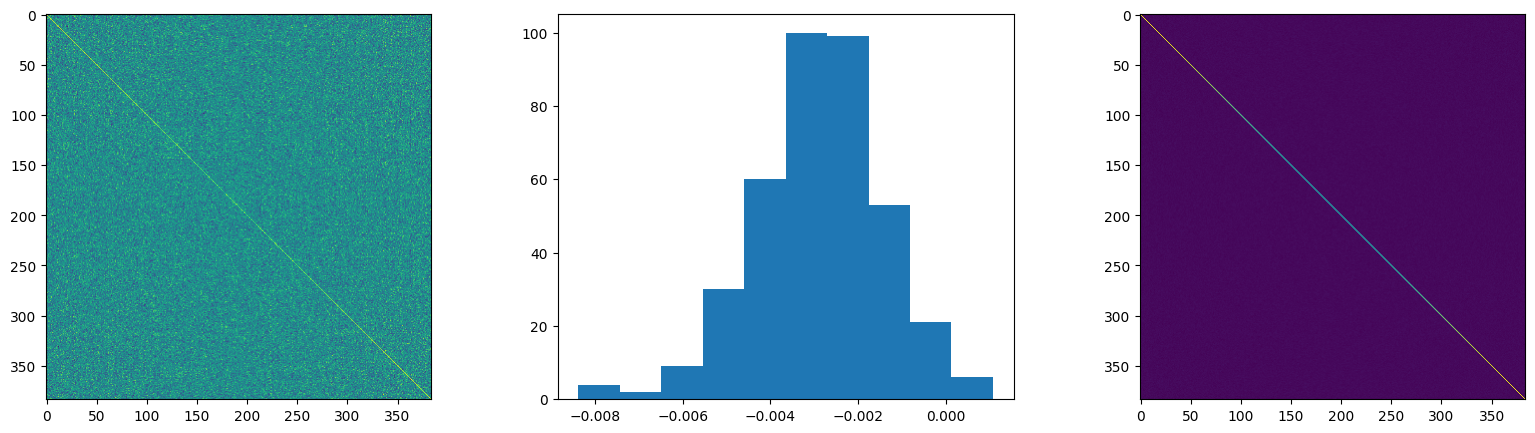

In [39]:
# Inspect SAGE weights

# import matplotlib.pyplot as plt

# conv_layer = 1
# fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# for i, (name, param) in enumerate(model.topic_encoder.sage_conv.convs[conv_layer].named_parameters()):
#     print(f'param <{name}> - type: {type(param)}, size: {param.size()}')
#     if len(param.size()) == 1:
#         axs[i].hist(param.detach().cpu().numpy())
#     elif len(param.size()) == 2:
#         axs[i].imshow(param.detach().cpu().numpy())

In [8]:
# !zip -r output.zip kaggle/working/output

  adding: kaggle/working/output/ (stored 0%)
  adding: kaggle/working/output/.ipynb_checkpoints/ (stored 0%)
  adding: kaggle/working/output/encodings/ (stored 0%)
  adding: kaggle/working/output/encodings/content_enc.bin (deflated 95%)
  adding: kaggle/working/output/encodings/topic_enc.bin (deflated 99%)
  adding: kaggle/working/output/checkpoints/ (stored 0%)
  adding: kaggle/working/output/checkpoints/retriever_ckpt_2023-04-25_14-02-52_9_bkp.pt (deflated 9%)
  adding: kaggle/working/output/checkpoints/retriever_ckpt_2023-04-25_14-02-52_9.pt (deflated 9%)
  adding: kaggle/working/output/checkpoints/retriever_ckpt_2023-04-25_13-34-31_10_bkp.pt (deflated 47%)
  adding: kaggle/working/output/tb_logs/ (stored 0%)
  adding: kaggle/working/output/tb_logs/retriever_trainer_fold0\_2023-04-23_13-33-20/ (stored 0%)
  adding: kaggle/working/output/tb_logs/retriever_trainer_fold0\_2023-04-23_13-33-20/Epochs_retriever_loss_train/ (stored 0%)
  adding: kaggle/working/output/tb_logs/retriever_trai

In [ ]:
# del model, trainer
# gc.collect()
# torch.cuda.empty_cache()

### Inference

In [33]:
# ! cp 'kaggle/working/output/checkpoints/retriever_ckpt_2023-04-25_14-02-52_9.pt' 'kaggle/working/output/checkpoints/retriever_ckpt_2023-04-25_14-02-52_9_bkp.pt'

In [7]:
print('Checkpoints stored:\n' + '\n'.join(['    ' + p for p in sorted(os.listdir(cfg.checkpoints_dir))]))

Checkpoints stored:
    retriever_ckpt_2023-04-25_13-34-31_10_bkp.pt
    retriever_ckpt_2023-04-25_14-02-52_9.pt
    retriever_ckpt_2023-04-25_14-02-52_9_bkp.pt


In [ ]:
inference  = False

stage_1    = True
stage_2    = True

submission = True

if __name__ == '__main__' and inference:
    assert stage_1 or stage_2, "Choose at least one stage to run"
    
    START_TIME = datetime.now()
    logfile = f'test_log_{START_TIME.strftime("%Y-%m-%d_%H-%M-%S")}.log'
    logger = get_logger(cfg.logs_dir/logfile)
    logger.info(f'Config:\n{cfg}')
    logger.info(f'START INFERENCE - {START_TIME}')
    
    # Pre-processing
    prepare_data(train=False)
    retriever_ckpt = torch.load(cfg.checkpoints_dir/'retriever_ckpt_20230327_163138_1.pt')
    reranker_ckpt = torch.load(cfg.checkpoints_dir/'reranker_ckpt_20230323_173614_1.pt')

    # Stage 1
    if stage_1:
        stage_1_pairs = infer_stage_1(retriever_ckpt)
        logger.info(f'STAGE 1 COMPLETE')

    # Stage 2
    if stage_2:
        stage_2_pairs = infer_stage_2(reranker_ckpt, stage_1_pairs)    
        logger.info(f'STAGE 2 COMPLETE')

    # Output submission
    if submission:
        pairs = stage_2_pairs if stage_2 else stage_1_pairs
        make_submission(pairs)

    END_TIME = datetime.now()
    logger.info(f'END INFERENCE   - {END_TIME} (+{END_TIME - START_TIME})')

### Experiments